# HES_demo

This notebook demos how to work with the Household Electricity Survey data

## 1. Setup

In [1]:
# import packages
import pandas as pd
import os
import numpy as np

In [2]:
# set up filenames
data_dir=r'C:\Users\cvskf\OneDrive - Loughborough University\_Data\Household_Electricity_Survey_2011\Data'
data_folder_filenames=(
    ('agd-1a','appliance_group_data-1a.csv'),
    ('agd-1b','appliance_group_data-1b.csv'),
    ('agd-1c','appliance_group_data-1c.csv'),
    ('agd-1d','appliance_group_data-1d.csv'),
    ('agd-2','appliance_group_data-2.csv'),
    ('agd-3','appliance_group_data-3.csv')
)

## 2. Read data

In [3]:
# what are the first rows of each data file?
for folder, filename in data_folder_filenames:
    print(filename)
    fp=os.path.join(data_dir,folder,filename)
    with open (fp) as f:
        print(f.readline())


appliance_group_data-1a.csv
1,202116,0,2010-07-28,0,00:00:00

appliance_group_data-1b.csv
1,202288,93,2011-02-02,6,14:50:00

appliance_group_data-1c.csv
1,203319,160,2011-05-02,0,14:34:00

appliance_group_data-1d.csv
1,203470,253,2011-06-22,196,07:28:00

appliance_group_data-2.csv
2,101006,0,2010-11-24,28,15:44:00

appliance_group_data-3.csv
3,102008,0,2010-11-28,0,00:00:00



In [7]:
# function to read in a single file 
def read_single_file(fp):
    ""
    df=pd.read_csv(
        fp,
        header=None,
        names=['GROUP','HOUSE_ID','APPLIANCE_ID','DATE','POWER','TIME'],  # I'm guessing these column names
        parse_dates=['DATE']
    )
    return df

# test - using 'appliance_group_data-1a.csv'
df=read_single_file(os.path.join(data_dir,*data_folder_filenames[0]))
display(df)
df.info()

,GROUP,HOUSE_ID,APPLIANCE_ID,DATE,POWER,TIME
0,1,202116,0,2010-07-28,0,00:00:00
1,1,202116,0,2010-07-28,0,00:02:00
2,1,202116,0,2010-07-28,0,00:04:00
3,1,202116,0,2010-07-28,0,00:06:00
4,1,202116,0,2010-07-28,0,00:08:00
...,...,...,...,...,...,...
39999995,1,202288,93,2011-02-02,4,14:40:00
39999996,1,202288,93,2011-02-02,4,14:42:00
39999997,1,202288,93,2011-02-02,4,14:44:00
39999998,1,202288,93,2011-02-02,4,14:46:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000000 entries, 0 to 39999999
Data columns (total 6 columns):
 #   Column        Dtype         
---  ------        -----         
 0   GROUP         int64         
 1   HOUSE_ID      int64         
 2   APPLIANCE_ID  int64         
 3   DATE          datetime64[ns]
 4   POWER         int64         
 5   TIME          object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.8+ GB


In [8]:
# what are the unique values in 'appliance_group_data-1a.csv'
df=read_single_file(os.path.join(data_dir,*data_folder_filenames[0]))
for col in df:
    print(col)
    print('unique values -> ',np.sort(df[col].unique()))

GROUP
unique values ->  [1]
HOUSE_ID
unique values ->  [201103 201110 201111 201125 201128 201129 201130 201132 201144 201145
 201146 201147 201148 201189 201190 201192 201193 201194 201205 201206
 201218 201221 201222 201223 201226 201230 201270 201271 201272 201276
 201282 201290 201297 201307 201311 201312 201313 201324 201325 201326
 201327 201328 201330 201331 201343 201347 201348 201364 201384 201387
 201388 201389 201411 201412 201483 201488 201490 201491 202112 202113
 202114 202115 202116 202118 202127 202134 202136 202152 202153 202155
 202156 202161 202162 202170 202171 202176 202178 202179 202182 202186
 202187 202202 202213 202216 202217 202239 202240 202241 202243 202244
 202246 202247 202248 202254 202266 202267 202268 202273 202274 202275
 202278 202280 202288 202293 202298 202302 202305 202306 202314 202315
 202351 202352 202374 202375 202377 202394 202403 202404 202429 202431
 202434 202448 202449 202471 202472 203106 203107 203108 203109 203120
 203121 203122 203139 

unique values ->  [   0    1    2 ... 3798 3811 8256]
TIME
unique values ->  ['00:00:00' '00:02:00' '00:04:00' '00:06:00' '00:08:00' '00:10:00'
 '00:12:00' '00:14:00' '00:16:00' '00:18:00' '00:20:00' '00:22:00'
 '00:24:00' '00:26:00' '00:28:00' '00:30:00' '00:32:00' '00:34:00'
 '00:36:00' '00:38:00' '00:40:00' '00:42:00' '00:44:00' '00:46:00'
 '00:48:00' '00:50:00' '00:52:00' '00:54:00' '00:56:00' '00:58:00'
 '01:00:00' '01:02:00' '01:04:00' '01:06:00' '01:08:00' '01:10:00'
 '01:12:00' '01:14:00' '01:16:00' '01:18:00' '01:20:00' '01:22:00'
 '01:24:00' '01:26:00' '01:28:00' '01:30:00' '01:32:00' '01:34:00'
 '01:36:00' '01:38:00' '01:40:00' '01:42:00' '01:44:00' '01:46:00'
 '01:48:00' '01:50:00' '01:52:00' '01:54:00' '01:56:00' '01:58:00'
 '02:00:00' '02:02:00' '02:04:00' '02:06:00' '02:08:00' '02:10:00'
 '02:12:00' '02:14:00' '02:16:00' '02:18:00' '02:20:00' '02:22:00'
 '02:24:00' '02:26:00' '02:28:00' '02:30:00' '02:32:00' '02:34:00'
 '02:36:00' '02:38:00' '02:40:00' '02:42:00' '02:44:

In [23]:
# read in all files and create a 'daily total' dataframe
df_daily_total=pd.DataFrame(columns=['GROUP','HOUSE_ID','APPLIANCE_ID','DATE','POWER_TOTAL'])
for folder, filename in data_folder_filenames:
    print(filename)
    fp=os.path.join(data_dir,folder,filename)
    df=read_single_file(fp)
    df=df.groupby(['GROUP','HOUSE_ID','APPLIANCE_ID','DATE'])[['POWER']].sum().reset_index()
    df=df.rename(columns={'POWER':'POWER_TOTAL'})
    df_daily_total=df_daily_total.append(df)
df_daily_total=df_daily_total.groupby(['GROUP','HOUSE_ID','APPLIANCE_ID','DATE'])[['POWER_TOTAL']].sum().reset_index()
df_daily_total

appliance_group_data-1a.csv
appliance_group_data-1b.csv
appliance_group_data-1c.csv
appliance_group_data-1d.csv
appliance_group_data-2.csv
appliance_group_data-3.csv


,GROUP,HOUSE_ID,APPLIANCE_ID,DATE,POWER_TOTAL
0,1,201103,2,2010-06-17,29676
1,1,201103,2,2010-06-18,30602
2,1,201103,2,2010-06-19,31240
3,1,201103,2,2010-06-20,27658
4,1,201103,2,2010-06-21,28359
...,...,...,...,...,...
517132,3,103037,255,2011-07-01,31452
517133,3,103037,255,2011-07-02,32598
517134,3,103037,255,2011-07-03,31024
517135,3,103037,255,2011-07-04,32794


In [24]:
df_daily_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517137 entries, 0 to 517136
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   GROUP         517137 non-null  int64         
 1   HOUSE_ID      517137 non-null  int64         
 2   APPLIANCE_ID  517137 non-null  int64         
 3   DATE          517137 non-null  datetime64[ns]
 4   POWER_TOTAL   517137 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 19.7 MB


## example analysis

<AxesSubplot:xlabel='DATE'>

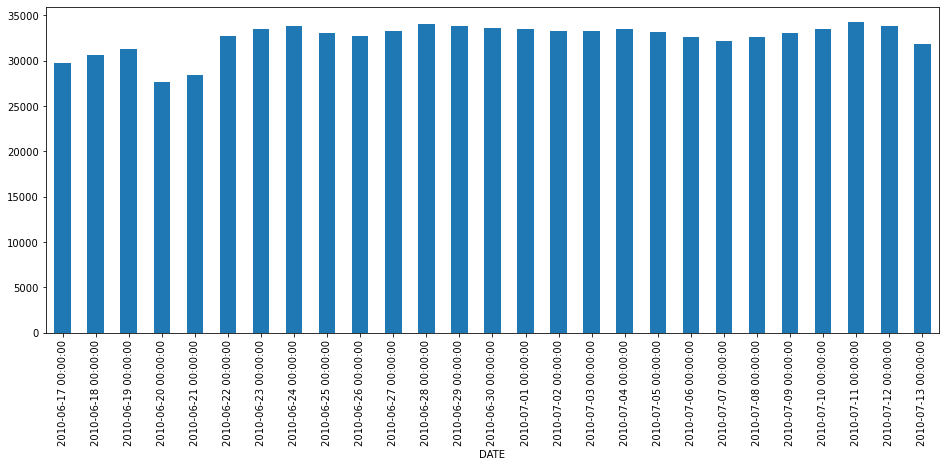

In [25]:
## what are the daily totals for 'appliance 2' in 'house 201103' (for group 1)
mask=(df_daily_total.GROUP==1) & (df_daily_total.HOUSE_ID==201103) & (df_daily_total.APPLIANCE_ID==2)
df_daily_total[mask].set_index('DATE').POWER_TOTAL.plot.bar(figsize=(16,6))

Note: If power is measured in Watts then should really be converted to kWh before summing to daily totals.